# Натянуть сову на линейное пространство

Создайте эмбеддинги слов и визуализируйте векторные операции над ними: сложение, вычитание, взятие ближайшего, дальнейшего и прочее. Сравните качество представлений gensim и BERT с точки зрения операций над словами, докажите примерами.

Для создания эмбеддингов с gensim обучите модель на нормализованных текстовых данных. Данные найдите на kaggle или выберите один из предложенных датасетов. Для создания эмбеддингов с BERT используйте предобученные модели.

Предлагаемые датасеты:
 - [sentiment твитов про ковид](https://www.kaggle.com/datatattle/covid-19-nlp-text-classification)
 - [Amazon product reviews](https://www.kaggle.com/kashnitsky/hierarchical-text-classification)
 - [Отзывы интернет-магазина](https://www.kaggle.com/shymammoth/shopee-reviews)
 - [Тексты статей конференции NIPS](https://www.kaggle.com/rowhitswami/nips-papers-1987-2019-updated?select=papers.csv)

# Projector

Из прошлого задания вы выяснили наиболее хорошую для представления связей между словами модель. Спроецируйте ~2-3 тысячи наиболее популярных слов из выбранного корпуса в tensorflow projector.

In [1]:
import pandas as pd
import nltk
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nh5\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nh5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def pretransform_text(comment):
    return [x.lower() for x in word_tokenize(comment) if x.isalpha()]

dataset0 = pd.read_csv('unlabeled_150k.csv')
dataset1 = dataset0.Text.apply(pretransform_text)

In [3]:
def transform_text(words):
    res = []
    for x in words:
        y = wn.morphy(x)
        if y:
            res.append(y)
        else:
            res.append(x)
    return res

dataset2 = dataset1.apply(transform_text)

In [4]:
dataset2

0         [i, do, not, know, what, they, be, thinking, w...
1         [i, have, use, algae, fix, once, a, week, in, ...
2         [norelco, get, it, right, with, their, new, bo...
3         [very, comfortable, support, at, least, compar...
4         [the, stamp, are, a, little, smaller, than, i,...
                                ...                        
149995    [i, wa, so, excite, to, see, this, on, amazon,...
149996    [my, daughter, kick, it, a, few, times, she, l...
149997    [i, have, be, using, the, oral, b, electric, t...
149998    [look, colorful, after, application, however, ...
149999    [have, these, candy, as, a, kid, i, describe, ...
Name: Text, Length: 150000, dtype: object

In [5]:
import gensim
from gensim.models import Word2Vec

C:\Users\nh5\miniconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [6]:
model = Word2Vec(sentences=dataset2,
                 sg=False, vector_size=100,
                 window=5,
                 seed=0,
                 epochs=15,
                 min_count=1,
                 workers=15)

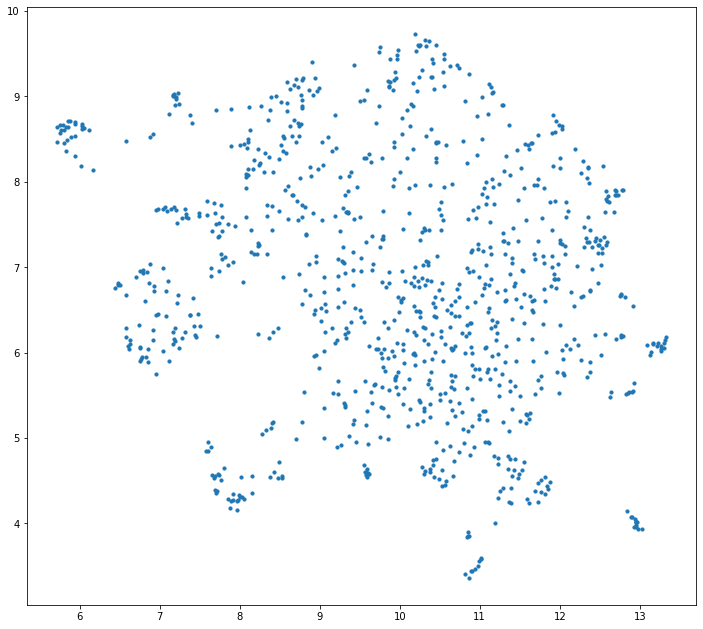

In [7]:
import umap
import matplotlib.pyplot as plt

points = umap.UMAP(random_state=30).fit_transform(model.wv.vectors[:1000])
plt.figure(figsize=(12, 11))
plt.scatter(x=points[:, 0], y=points[:, 1], s=10)
plt.show()

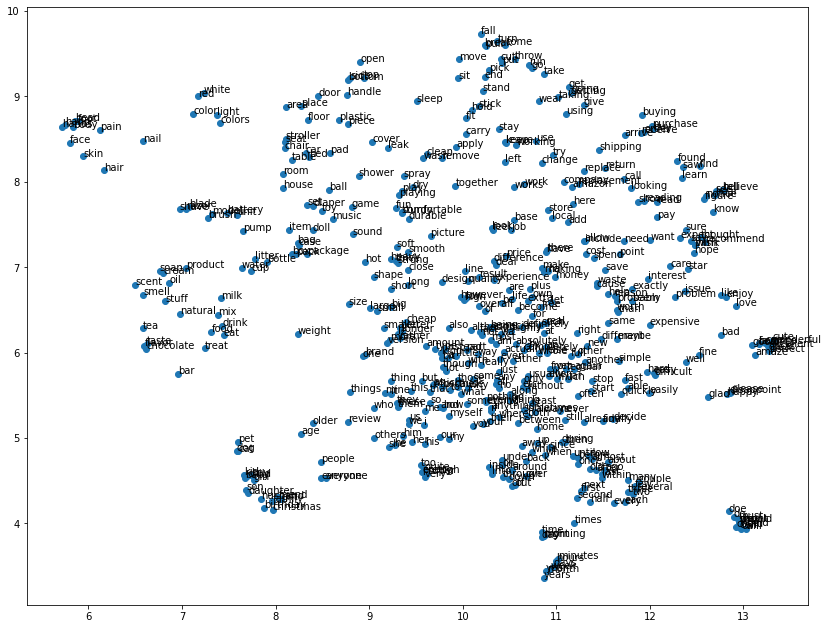

In [8]:
fig, ax = plt.subplots(figsize=(14, 11))
ax.scatter(points[:500, 0], points[:500, 1])
for i, txt in enumerate(model.wv.index_to_key[:500]):
    ax.annotate(txt, (points[i, 0], points[i, 1]))
plt.show()

In [203]:
import numpy as np

class WordEmbedder:
    def embed_word(self, word):
        pass

    def similar_by_embed(self, emb):
        pass

class WordNetWordEmbedder(WordEmbedder):
    def __init__(self, model):
        self.model = model

    def embed_word(self, word):
        return model.wv.vectors[model.wv.key_to_index[word]]

    def similar_by_embed(self, emb):
        return model.wv.similar_by_vector(emb)

def visualize_vec_op(title, embedder, args, op, cmp_to):
    args_e = list(map(embedder.embed_word, args))
    cmp_to_e = list(map(embedder.embed_word, cmp_to))
    res = op(*args_e)
    for x,x_e in zip(args, args_e):
        print('Similar to \'' + x + '\':', embedder.similar_by_embed(x_e))
    print('Similar to result:', embedder.similar_by_embed(res))
    if len(res) > 500:
        plt.imshow(np.stack(args_e + [res] + cmp_to_e), interpolation='nearest', aspect = 200 / (len(args_e) + 1 + len(cmp_to_e)))
    else:
        plt.imshow(np.stack(args_e + [res] + cmp_to_e), interpolation='nearest', aspect = 8 / (len(args_e) + 1 + len(cmp_to_e)))
    plt.title(title)
    plt.show()

Similar to 'nephew': [('nephew', 1.0), ('grandson', 0.8956974744796753), ('niece', 0.8404713273048401), ('neice', 0.786836564540863), ('son', 0.7841021418571472), ('grandchild', 0.740522027015686), ('granddaughter', 0.7297571897506714), ('grandaughter', 0.7209887504577637), ('grandkids', 0.7050846815109253), ('boyfriend', 0.7031482458114624)]
Similar to 'woman': [('woman', 0.9999998807907104), ('men', 0.7543092370033264), ('person', 0.6536264419555664), ('gentleman', 0.6413943767547607), ('people', 0.6408305764198303), ('lady', 0.6406617164611816), ('man', 0.6247836351394653), ('folks', 0.5909784436225891), ('colleague', 0.574265718460083), ('female', 0.5529584884643555)]
Similar to 'man': [('man', 0.9999999403953552), ('guy', 0.6776886582374573), ('lady', 0.6361649632453918), ('gentleman', 0.6283634901046753), ('woman', 0.6247836351394653), ('precident', 0.6182951927185059), ('boss', 0.5719578862190247), ('person', 0.553942084312439), ('men', 0.5358125567436218), ('teenager', 0.532196

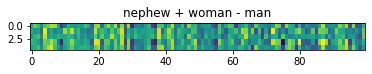

Similar to 'room': [('room', 1.0), ('bedroom', 0.7037844657897949), ('space', 0.667455792427063), ('playroom', 0.6343758702278137), ('bathroom', 0.6188045740127563), ('rooms', 0.6168777942657471), ('closet', 0.612250030040741), ('kitchen', 0.5986299514770508), ('hallway', 0.5903228521347046), ('house', 0.5847475528717041)]
Similar to 'glass': [('glass', 1.0), ('thermos', 0.6367263793945312), ('pot', 0.6104722619056702), ('cylinder', 0.5811813473701477), ('teapot', 0.5759235620498657), ('martini', 0.5717376470565796), ('mug', 0.5649722218513489), ('canister', 0.5582485795021057), ('stove', 0.551921010017395), ('dropper', 0.5500316023826599)]
Similar to result: [('room', 0.8291343450546265), ('glass', 0.6937741041183472), ('kitchen', 0.6254082322120667), ('bathroom', 0.6067566275596619), ('bedroom', 0.5961077213287354), ('sink', 0.5733569264411926), ('space', 0.5733489394187927), ('tank', 0.5702893733978271), ('faucet', 0.5575639605522156), ('closet', 0.5472132563591003)]


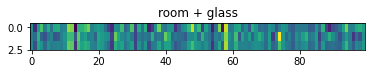

Farthest word of review:
[('normal', 0.3877168297767639), ('during', 0.36326608061790466), ('anytime', 0.3172838091850281), ('evade', 0.3113187849521637), ('full', 0.30679285526275635), ('thingie', 0.3065812885761261), ('manage', 0.3044385313987732), ('wou', 0.3008368909358978), ('pant', 0.29960715770721436), ('etc', 0.2987617254257202)]
Closest word to great:
[('great', 1.0), ('fantastic', 0.8411176204681396), ('wonderful', 0.8186936378479004), ('terrific', 0.7938623428344727), ('good', 0.7529428601264954), ('fabulous', 0.7350836396217346), ('awesome', 0.6774207949638367), ('perfect', 0.6690894961357117), ('excellent', 0.6646650433540344), ('nice', 0.6594042181968689)]


In [239]:
import operator

embedder = WordNetWordEmbedder(model)
visualize_vec_op('nephew + woman - man', embedder, ['nephew', 'woman', 'man'], lambda x, y, z: x + y - z, ['niece'])
visualize_vec_op('room + glass', embedder, ['room', 'glass'], lambda x, y: (x + y) / 2, [])
print('Farthest word of %s:' % 'review')
print(embedder.similar_by_embed(-embedder.embed_word('review')))
print('Closest word to %s:' % 'great')
print(embedder.similar_by_embed(embedder.embed_word('great')))

In [11]:
import torch
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [12]:
BERT_model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )
BERT_model.eval()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

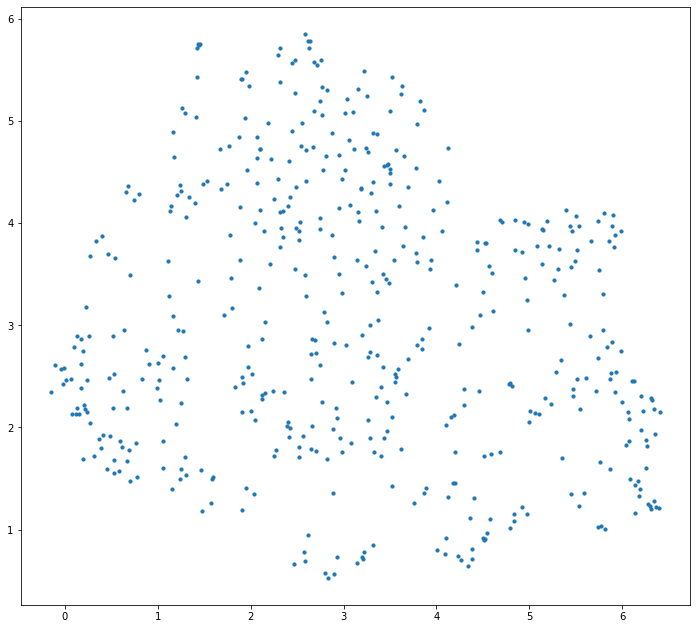

In [93]:
def BERT_embed(word):
    tokenized_text = tokenizer.tokenize("[CLS] " + word + " [SEP]")
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    with torch.no_grad():
        outputs = BERT_model(torch.tensor([indexed_tokens]))
        hidden_states = outputs[2]
        token_vecs = hidden_states[-2][0]
        sentence_embedding = torch.mean(token_vecs, dim=0)
    return np.array(sentence_embedding)

import umap
import matplotlib.pyplot as plt

BERT_embedded = list(map(BERT_embed, model.wv.index_to_key[:500]))

points = umap.UMAP(random_state=30).fit_transform(BERT_embedded)
plt.figure(figsize=(12, 11))
plt.scatter(x=points[:, 0], y=points[:, 1], s=10)
plt.show()

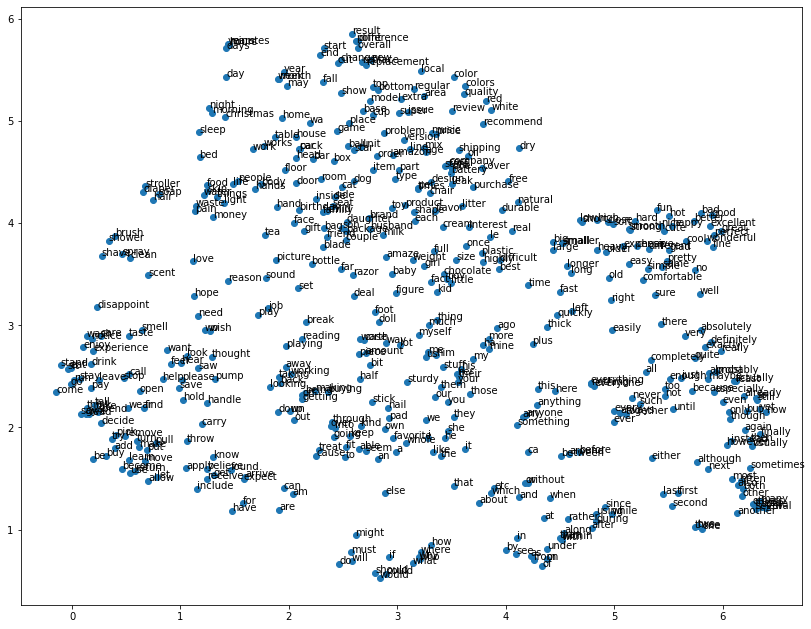

In [94]:
fig, ax = plt.subplots(figsize=(14, 11))
ax.scatter(points[:500, 0], points[:500, 1])
for i, txt in enumerate(model.wv.index_to_key[:500]):
    ax.annotate(txt, (points[i, 0], points[i, 1]))
plt.show()

In [95]:
from collections import Counter
counts = Counter(dataset2.apply(' '.join).str.cat(sep=' ').split())

In [105]:
# list(map(lambda x: x[0], sorted(list(counts.items()), key=lambda x: -x[1]))).index('niece')
top_words = list(map(lambda x: x[0], sorted(list(counts.items()), key=lambda x: -x[1])))[:1500]
top_words += ['king', 'queen']

In [106]:
BERT_embedded = {}
for word in top_words:
    BERT_embedded[word] = torch.tensor(BERT_embed(word))

Similar to 'doll': [('doll', 1.0), ('bowl', 0.9364705681800842), ('puzzle', 0.936183750629425), ('snack', 0.9360908269882202), ('bubble', 0.9357008934020996), ('cookie', 0.9346415400505066), ('nail', 0.9309470653533936), ('scoop', 0.9295679926872253), ('tear', 0.9284648895263672), ('latch', 0.9250919818878174)]
Similar to 'man': [('man', 1.0), ('woman', 0.9118212461471558), ('guy', 0.8982911109924316), ('scratch', 0.8865714073181152), ('collar', 0.8840135335922241), ('touch', 0.8820788860321045), ('bear', 0.8818455338478088), ('kid', 0.8805645108222961), ('job', 0.8805471658706665), ('trouble', 0.8795923590660095)]
Similar to 'woman': [('woman', 1.0), ('man', 0.9118212461471558), ('girl', 0.9066593050956726), ('wife', 0.9036552906036377), ('guy', 0.8830767869949341), ('person', 0.8769952654838562), ('daughter', 0.8687664866447449), ('guard', 0.8631539344787598), ('couple', 0.8624030351638794), ('brother', 0.8606142997741699)]
Similar to result: [('doll', 0.9354286789894104), ('puzzle',

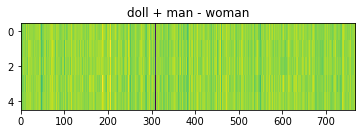

Similar to 'room': [('room', 1.0), ('space', 0.9051156044006348), ('mattress', 0.8887113332748413), ('liquid', 0.8864378929138184), ('yard', 0.8838071227073669), ('bottle', 0.8833967447280884), ('piece', 0.8789685964584351), ('box', 0.8789543509483337), ('counter', 0.8769025802612305), ('truck', 0.87660151720047)]
Similar to 'glass': [('glass', 1.0), ('mirror', 0.9285590052604675), ('crate', 0.9089182019233704), ('metal', 0.9080217480659485), ('bottle', 0.9043061137199402), ('glasses', 0.9014248847961426), ('wood', 0.8998422026634216), ('water', 0.8960831761360168), ('chips', 0.8937450051307678), ('liquid', 0.8933449983596802)]
Similar to result: [('room', 0.9618681073188782), ('glass', 0.9614793658256531), ('bottle', 0.9294471144676208), ('liquid', 0.9253474473953247), ('mirror', 0.9250742197036743), ('crate', 0.9244628548622131), ('space', 0.9244509339332581), ('lock', 0.9161920547485352), ('box', 0.9156885147094727), ('mattress', 0.9131691455841064)]


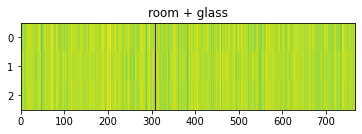

Farthest word of review:
[('didnt', -0.3845389187335968), ('moisturizer', -0.41111326217651367), ('doesnt', -0.4327808916568756), ('draw', -0.44840818643569946), ('disappoint', -0.4567694067955017), ('key', -0.4609464108943939), ('dont', -0.46426230669021606), ('shampoo', -0.47186872363090515), ('norelco', -0.4768381416797638), ('velcro', -0.48064562678337097)]
Closest word to great:
[('great', 1.0), ('awesome', 0.9107003808021545), ('wonderful', 0.8796312808990479), ('wow', 0.8788688778877258), ('fantastic', 0.8779162764549255), ('excellent', 0.8739767074584961), ('delicious', 0.8666186332702637), ('huge', 0.8663691878318787), ('weird', 0.85997074842453), ('fine', 0.8574626445770264)]


In [241]:
from bisect import bisect_left

class BERTEmbedder(WordEmbedder):
    def __init__(self, bmodel):
        self.model = bmodel

    def embed_word(self, word):
        return np.array(BERT_embedded[word])

    def similar_by_embed(self, emb):
        emb = torch.tensor(emb)
        ress = []
        for w2,emb2 in BERT_embedded.items():
            val = torch.cosine_similarity(emb, emb2, 0).item()
            keys = list(reversed(list(map(lambda x: x[1], ress))))
            idx = len(ress) - bisect_left(keys, val)
            if idx >= 10:
                continue
            ress.insert(idx, (w2, val))
            ress = ress[:10]
        return ress

BERT_embedder = BERTEmbedder(BERT_model)
# BERT_embedder.similar_by_embed(BERT_embedder.embed_word('man'))
visualize_vec_op('doll + man - woman', BERT_embedder, ['doll', 'man', 'woman'], lambda x, y, z: x + y - z, ['puzzle'])
visualize_vec_op('room + glass', BERT_embedder, ['room', 'glass'], lambda x, y: (x + y) / 2, [])
print('Farthest word of %s:' % 'review')
print(BERT_embedder.similar_by_embed(-BERT_embedder.embed_word('review')))
print('Closest word to %s:' % 'great')
print(BERT_embedder.similar_by_embed(BERT_embedder.embed_word('great')))

In [229]:
import numpy as np

def restrict_w2v(w2v, restricted_word_set):
    new_vectors = []
    new_index_to_key = []
    new_key_to_index = {}

    for i in range(len(w2v.index_to_key)):
        word = w2v.index_to_key[i]
        vec = w2v.vectors[i]
        if word in restricted_word_set:
            new_key_to_index[word] = len(new_index_to_key)
            new_index_to_key.append(word)
            new_vectors.append(vec)

    w2v.vectors = np.array(new_vectors)
    w2v.index_to_key = np.array(new_index_to_key)
    w2v.key_to_index = new_key_to_index
    w2v.index2word = np.array(new_index_to_key)
    return w2v

model.wv.save('full_model')
copy = gensim.models.KeyedVectors.load('full_model')
restrict_w2v(copy, set(list(map(lambda x: x[0], sorted(list(counts.items()), key=lambda x: -x[1])))[:2500])).save_word2vec_format('cut_model')

In [230]:
! python -m gensim.scripts.word2vec2tensor -i cut_model -o out_tensor

C:\Users\nh5\miniconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
2021-12-10 03:54:11,941 - word2vec2tensor - INFO - running C:\Users\nh5\miniconda3\lib\site-packages\gensim\scripts\word2vec2tensor.py -i cut_model -o out_tensor
2021-12-10 03:54:11,942 - keyedvectors - INFO - loading projection weights from cut_model
2021-12-10 03:54:12,092 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (2500, 100) matrix of type float32 from cut_model', 'binary': False, 'encoding': 'utf8', 'datetime': '2021-12-10T03:54:12.085451', 'gensim': '4.0.1', 'python': '3.9.5 (default, May 18 2021, 14:42:02) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'load_word2vec_format